In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [3]:
import pandas as pd

df = pd.read_csv("/content/age2019_02_noComa_cgName.csv", encoding="cp949", index_col=0)
df.head()

,총인구수,연령구간인구수,2019년02월_계_0세,2019년02월_계_1세,2019년02월_계_2세,2019년02월_계_3세,2019년02월_계_4세,2019년02월_계_5세,2019년02월_계_6세,2019년02월_계_7세,2019년02월_계_8세,2019년02월_계_9세,2019년02월_계_10세,2019년02월_계_11세,2019년02월_계_12세,2019년02월_계_13세,2019년02월_계_14세,2019년02월_계_15세,2019년02월_계_16세,2019년02월_계_17세,2019년02월_계_18세,2019년02월_계_19세,2019년02월_계_20세,2019년02월_계_21세,2019년02월_계_22세,2019년02월_계_23세,2019년02월_계_24세,2019년02월_계_25세,2019년02월_계_26세,2019년02월_계_27세,2019년02월_계_28세,2019년02월_계_29세,2019년02월_계_30세,2019년02월_계_31세,2019년02월_계_32세,2019년02월_계_33세,2019년02월_계_34세,2019년02월_계_35세,2019년02월_계_36세,2019년02월_계_37세,...,2019년02월_계_61세,2019년02월_계_62세,2019년02월_계_63세,2019년02월_계_64세,2019년02월_계_65세,2019년02월_계_66세,2019년02월_계_67세,2019년02월_계_68세,2019년02월_계_69세,2019년02월_계_70세,2019년02월_계_71세,2019년02월_계_72세,2019년02월_계_73세,2019년02월_계_74세,2019년02월_계_75세,2019년02월_계_76세,2019년02월_계_77세,2019년02월_계_78세,2019년02월_계_79세,2019년02월_계_80세,2019년02월_계_81세,2019년02월_계_82세,2019년02월_계_83세,2019년02월_계_84세,2019년02월_계_85세,2019년02월_계_86세,2019년02월_계_87세,2019년02월_계_88세,2019년02월_계_89세,2019년02월_계_90세,2019년02월_계_91세,2019년02월_계_92세,2019년02월_계_93세,2019년02월_계_94세,2019년02월_계_95세,2019년02월_계_96세,2019년02월_계_97세,2019년02월_계_98세,2019년02월_계_99세,2019년02월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),9770638,9770638,53738,59599,65815,70726,70037,69000,76377,73745,75639,70189,74217,80273,74774,71529,78329,82561,82083,90416,107254,109552,114315,122473,129497,141673,150625,156258,165662,165771,152776,151006,150177,144503,144300,145260,142644,157624,164934,168159,...,142867,132352,135608,123861,103339,110202,83062,85623,88133,85983,86008,79560,60652,63418,59401,72043,60979,49561,47432,42445,37293,33253,29705,25250,20503,17751,14506,12100,10729,8923,7199,5374,3972,2927,2813,2260,1565,1180,880,5932
서울특별시 종로구 (1111000000),152880,152880,593,683,775,874,852,863,1023,904,1012,923,1004,1151,1084,1005,1099,1180,1171,1338,1528,1767,1899,2122,2193,2454,2438,2572,2682,2598,2446,2234,2206,2161,2060,1949,1888,2149,2116,2219,...,2267,2204,2185,2014,1665,1796,1362,1387,1454,1432,1512,1369,1099,1215,1144,1424,1245,1044,1065,894,763,725,626,572,462,395,336,282,236,199,163,132,112,79,69,81,53,40,39,236
서울특별시 종로구 청운효자동(1111051500),13010,13010,66,79,72,98,98,94,108,109,115,95,125,142,130,105,136,124,134,151,155,147,172,143,181,188,139,163,171,186,151,137,168,157,172,160,162,193,178,232,...,150,138,160,131,132,124,91,103,115,106,119,118,95,103,92,125,94,87,103,83,64,67,62,47,47,31,30,12,21,14,9,8,14,6,7,9,4,2,2,16
서울특별시 종로구 사직동(1111053000),9584,9584,43,50,64,67,67,70,94,65,82,64,88,73,88,70,64,75,77,68,81,96,95,110,93,103,127,120,151,139,137,126,127,169,150,124,120,138,147,146,...,137,139,117,114,106,116,65,91,85,85,95,78,74,80,68,80,82,75,66,68,60,53,60,51,38,26,22,22,20,17,14,5,12,6,5,8,2,5,4,17
서울특별시 종로구 삼청동(1111054000),2820,2820,9,15,3,21,11,13,9,16,14,25,18,27,20,17,19,17,17,27,23,27,25,36,29,35,35,33,37,31,36,42,46,35,35,41,32,42,45,57,...,46,41,51,51,27,45,23,24,36,34,43,31,19,28,23,33,34,25,26,15,18,20,16,14,14,14,10,8,8,4,6,6,1,3,0,3,1,0,2,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3841 entries, 서울특별시  (1100000000) to 제주특별자치도 서귀포시 예래동(5013062000)
Columns: 103 entries, 총인구수 to 2019년02월_계_100세 이상
dtypes: int64(103)
memory usage: 3.0+ MB


In [5]:
df = df.div(df["총인구수"], axis=0)
df

,총인구수,연령구간인구수,2019년02월_계_0세,2019년02월_계_1세,2019년02월_계_2세,2019년02월_계_3세,2019년02월_계_4세,2019년02월_계_5세,2019년02월_계_6세,2019년02월_계_7세,2019년02월_계_8세,2019년02월_계_9세,2019년02월_계_10세,2019년02월_계_11세,2019년02월_계_12세,2019년02월_계_13세,2019년02월_계_14세,2019년02월_계_15세,2019년02월_계_16세,2019년02월_계_17세,2019년02월_계_18세,2019년02월_계_19세,2019년02월_계_20세,2019년02월_계_21세,2019년02월_계_22세,2019년02월_계_23세,2019년02월_계_24세,2019년02월_계_25세,2019년02월_계_26세,2019년02월_계_27세,2019년02월_계_28세,2019년02월_계_29세,2019년02월_계_30세,2019년02월_계_31세,2019년02월_계_32세,2019년02월_계_33세,2019년02월_계_34세,2019년02월_계_35세,2019년02월_계_36세,2019년02월_계_37세,...,2019년02월_계_61세,2019년02월_계_62세,2019년02월_계_63세,2019년02월_계_64세,2019년02월_계_65세,2019년02월_계_66세,2019년02월_계_67세,2019년02월_계_68세,2019년02월_계_69세,2019년02월_계_70세,2019년02월_계_71세,2019년02월_계_72세,2019년02월_계_73세,2019년02월_계_74세,2019년02월_계_75세,2019년02월_계_76세,2019년02월_계_77세,2019년02월_계_78세,2019년02월_계_79세,2019년02월_계_80세,2019년02월_계_81세,2019년02월_계_82세,2019년02월_계_83세,2019년02월_계_84세,2019년02월_계_85세,2019년02월_계_86세,2019년02월_계_87세,2019년02월_계_88세,2019년02월_계_89세,2019년02월_계_90세,2019년02월_계_91세,2019년02월_계_92세,2019년02월_계_93세,2019년02월_계_94세,2019년02월_계_95세,2019년02월_계_96세,2019년02월_계_97세,2019년02월_계_98세,2019년02월_계_99세,2019년02월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),1.0,1.0,0.005500,0.006100,0.006736,0.007239,0.007168,0.007062,0.007817,0.007548,0.007741,0.007184,0.007596,0.008216,0.007653,0.007321,0.008017,0.008450,0.008401,0.009254,0.010977,0.011212,0.011700,0.012535,0.013254,0.014500,0.015416,0.015993,0.016955,0.016966,0.015636,0.015455,0.015370,0.014790,0.014769,0.014867,0.014599,0.016132,0.016881,0.017211,...,0.014622,0.013546,0.013879,0.012677,0.010576,0.011279,0.008501,0.008763,0.009020,0.008800,0.008803,0.008143,0.006208,0.006491,0.006080,0.007373,0.006241,0.005072,0.004855,0.004344,0.003817,0.003403,0.003040,0.002584,0.002098,0.001817,0.001485,0.001238,0.001098,0.000913,0.000737,0.000550,0.000407,0.000300,0.000288,0.000231,0.000160,0.000121,0.000090,0.000607
서울특별시 종로구 (1111000000),1.0,1.0,0.003879,0.004468,0.005069,0.005717,0.005573,0.005645,0.006692,0.005913,0.006620,0.006037,0.006567,0.007529,0.007091,0.006574,0.007189,0.007718,0.007660,0.008752,0.009995,0.011558,0.012422,0.013880,0.014345,0.016052,0.015947,0.016824,0.017543,0.016994,0.015999,0.014613,0.014430,0.014135,0.013475,0.012749,0.012350,0.014057,0.013841,0.014515,...,0.014829,0.014417,0.014292,0.013174,0.010891,0.011748,0.008909,0.009072,0.009511,0.009367,0.009890,0.008955,0.007189,0.007947,0.007483,0.009314,0.008144,0.006829,0.006966,0.005848,0.004991,0.004742,0.004095,0.003741,0.003022,0.002584,0.002198,0.001845,0.001544,0.001302,0.001066,0.000863,0.000733,0.000517,0.000451,0.000530,0.000347,0.000262,0.000255,0.001544
서울특별시 종로구 청운효자동(1111051500),1.0,1.0,0.005073,0.006072,0.005534,0.007533,0.007533,0.007225,0.008301,0.008378,0.008839,0.007302,0.009608,0.010915,0.009992,0.008071,0.010453,0.009531,0.010300,0.011606,0.011914,0.011299,0.013221,0.010992,0.013912,0.014450,0.010684,0.012529,0.013144,0.014297,0.011606,0.010530,0.012913,0.012068,0.013221,0.012298,0.012452,0.014835,0.013682,0.017832,...,0.011530,0.010607,0.012298,0.010069,0.010146,0.009531,0.006995,0.007917,0.008839,0.008148,0.009147,0.009070,0.007302,0.007917,0.007071,0.009608,0.007225,0.006687,0.007917,0.006380,0.004919,0.005150,0.004766,0.003613,0.003613,0.002383,0.002306,0.000922,0.001614,0.001076,0.000692,0.000615,0.001076,0.000461,0.000538,0.000692,0.000307,0.000154,0.000154,0.001230
서울특별시 종로구 사직동(1111053000),1.0,1.0,0.004487,0.005217,0.006678,0.006991,0.006991,0.007304,0.009808,0.006782,0.008556,0.006678,0.009182,0.007617,0.009182,0.007304,0.006678,0.007826,0.008034,0.007095,0.008452,0.010017,0.009912,0.011477,0.009704,0.010747,0.013251,0.012521,0.015755,0.014503,0.014295,0.013147,0.013251,0.017634,0.015651,0.012938,0.012521,0.014399,0.015338,0.015234,...,0.014295,0.014503,0.012208,0.011895,0.011060,0.012104,0.006782,0.009495,0.008869,0.008869,0.009912,0.008139,0.007721,0.008347,0.007095,0.008

In [6]:
del df["총인구수"], df["연령구간인구수"]
df.head()

,2019년02월_계_0세,2019년02월_계_1세,2019년02월_계_2세,2019년02월_계_3세,2019년02월_계_4세,2019년02월_계_5세,2019년02월_계_6세,2019년02월_계_7세,2019년02월_계_8세,2019년02월_계_9세,2019년02월_계_10세,2019년02월_계_11세,2019년02월_계_12세,2019년02월_계_13세,2019년02월_계_14세,2019년02월_계_15세,2019년02월_계_16세,2019년02월_계_17세,2019년02월_계_18세,2019년02월_계_19세,2019년02월_계_20세,2019년02월_계_21세,2019년02월_계_22세,2019년02월_계_23세,2019년02월_계_24세,2019년02월_계_25세,2019년02월_계_26세,2019년02월_계_27세,2019년02월_계_28세,2019년02월_계_29세,2019년02월_계_30세,2019년02월_계_31세,2019년02월_계_32세,2019년02월_계_33세,2019년02월_계_34세,2019년02월_계_35세,2019년02월_계_36세,2019년02월_계_37세,2019년02월_계_38세,2019년02월_계_39세,...,2019년02월_계_61세,2019년02월_계_62세,2019년02월_계_63세,2019년02월_계_64세,2019년02월_계_65세,2019년02월_계_66세,2019년02월_계_67세,2019년02월_계_68세,2019년02월_계_69세,2019년02월_계_70세,2019년02월_계_71세,2019년02월_계_72세,2019년02월_계_73세,2019년02월_계_74세,2019년02월_계_75세,2019년02월_계_76세,2019년02월_계_77세,2019년02월_계_78세,2019년02월_계_79세,2019년02월_계_80세,2019년02월_계_81세,2019년02월_계_82세,2019년02월_계_83세,2019년02월_계_84세,2019년02월_계_85세,2019년02월_계_86세,2019년02월_계_87세,2019년02월_계_88세,2019년02월_계_89세,2019년02월_계_90세,2019년02월_계_91세,2019년02월_계_92세,2019년02월_계_93세,2019년02월_계_94세,2019년02월_계_95세,2019년02월_계_96세,2019년02월_계_97세,2019년02월_계_98세,2019년02월_계_99세,2019년02월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),0.005500,0.006100,0.006736,0.007239,0.007168,0.007062,0.007817,0.007548,0.007741,0.007184,0.007596,0.008216,0.007653,0.007321,0.008017,0.008450,0.008401,0.009254,0.010977,0.011212,0.011700,0.012535,0.013254,0.014500,0.015416,0.015993,0.016955,0.016966,0.015636,0.015455,0.015370,0.014790,0.014769,0.014867,0.014599,0.016132,0.016881,0.017211,0.016667,0.016582,...,0.014622,0.013546,0.013879,0.012677,0.010576,0.011279,0.008501,0.008763,0.009020,0.008800,0.008803,0.008143,0.006208,0.006491,0.006080,0.007373,0.006241,0.005072,0.004855,0.004344,0.003817,0.003403,0.003040,0.002584,0.002098,0.001817,0.001485,0.001238,0.001098,0.000913,0.000737,0.000550,0.000407,0.000300,0.000288,0.000231,0.000160,0.000121,0.000090,0.000607
서울특별시 종로구 (1111000000),0.003879,0.004468,0.005069,0.005717,0.005573,0.005645,0.006692,0.005913,0.006620,0.006037,0.006567,0.007529,0.007091,0.006574,0.007189,0.007718,0.007660,0.008752,0.009995,0.011558,0.012422,0.013880,0.014345,0.016052,0.015947,0.016824,0.017543,0.016994,0.015999,0.014613,0.014430,0.014135,0.013475,0.012749,0.012350,0.014057,0.013841,0.014515,0.014410,0.014240,...,0.014829,0.014417,0.014292,0.013174,0.010891,0.011748,0.008909,0.009072,0.009511,0.009367,0.009890,0.008955,0.007189,0.007947,0.007483,0.009314,0.008144,0.006829,0.006966,0.005848,0.004991,0.004742,0.004095,0.003741,0.003022,0.002584,0.002198,0.001845,0.001544,0.001302,0.001066,0.000863,0.000733,0.000517,0.000451,0.000530,0.000347,0.000262,0.000255,0.001544
서울특별시 종로구 청운효자동(1111051500),0.005073,0.006072,0.005534,0.007533,0.007533,0.007225,0.008301,0.008378,0.008839,0.007302,0.009608,0.010915,0.009992,0.008071,0.010453,0.009531,0.010300,0.011606,0.011914,0.011299,0.013221,0.010992,0.013912,0.014450,0.010684,0.012529,0.013144,0.014297,0.011606,0.010530,0.012913,0.012068,0.013221,0.012298,0.012452,0.014835,0.013682,0.017832,0.018063,0.017371,...,0.011530,0.010607,0.012298,0.010069,0.010146,0.009531,0.006995,0.007917,0.008839,0.008148,0.009147,0.009070,0.007302,0.007917,0.007071,0.009608,0.007225,0.006687,0.007917,0.006380,0.004919,0.005150,0.004766,0.003613,0.003613,0.002383,0.002306,0.000922,0.001614,0.001076,0.000692,0.000615,0.001076,0.000461,0.000538,0.000692,0.000307,0.000154,0.000154,0.001230
서울특별시 종로구 사직동(1111053000),0.004487,0.005217,0.006678,0.006991,0.006991,0.007304,0.009808,0.006782,0.008556,0.006678,0.009182,0.007617,0.009182,0.007304,0.006678,0.007826,0.008034,0.007095,0.008452,0.010017,0.009912,0.011477,0.009704,0.010747,0.013251,0.012521,0.015755,0.014503,0.014295,0.013147,0.013251,0.017634,0.015651,0.012938,0.012521,0.014399,0.015338,0.015234,0.016590,0.013982,...,0.014295,0.014503,0.012208,0.011895,0.011060,0.012104,0.006782,0.009495,0.008869,0.

In [7]:
name = input("인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ")
a = df.index.str.contains(name)
df2 = df[a]
df2.head()


인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 신도림동


,2019년02월_계_0세,2019년02월_계_1세,2019년02월_계_2세,2019년02월_계_3세,2019년02월_계_4세,2019년02월_계_5세,2019년02월_계_6세,2019년02월_계_7세,2019년02월_계_8세,2019년02월_계_9세,2019년02월_계_10세,2019년02월_계_11세,2019년02월_계_12세,2019년02월_계_13세,2019년02월_계_14세,2019년02월_계_15세,2019년02월_계_16세,2019년02월_계_17세,2019년02월_계_18세,2019년02월_계_19세,2019년02월_계_20세,2019년02월_계_21세,2019년02월_계_22세,2019년02월_계_23세,2019년02월_계_24세,2019년02월_계_25세,2019년02월_계_26세,2019년02월_계_27세,2019년02월_계_28세,2019년02월_계_29세,2019년02월_계_30세,2019년02월_계_31세,2019년02월_계_32세,2019년02월_계_33세,2019년02월_계_34세,2019년02월_계_35세,2019년02월_계_36세,2019년02월_계_37세,2019년02월_계_38세,2019년02월_계_39세,...,2019년02월_계_61세,2019년02월_계_62세,2019년02월_계_63세,2019년02월_계_64세,2019년02월_계_65세,2019년02월_계_66세,2019년02월_계_67세,2019년02월_계_68세,2019년02월_계_69세,2019년02월_계_70세,2019년02월_계_71세,2019년02월_계_72세,2019년02월_계_73세,2019년02월_계_74세,2019년02월_계_75세,2019년02월_계_76세,2019년02월_계_77세,2019년02월_계_78세,2019년02월_계_79세,2019년02월_계_80세,2019년02월_계_81세,2019년02월_계_82세,2019년02월_계_83세,2019년02월_계_84세,2019년02월_계_85세,2019년02월_계_86세,2019년02월_계_87세,2019년02월_계_88세,2019년02월_계_89세,2019년02월_계_90세,2019년02월_계_91세,2019년02월_계_92세,2019년02월_계_93세,2019년02월_계_94세,2019년02월_계_95세,2019년02월_계_96세,2019년02월_계_97세,2019년02월_계_98세,2019년02월_계_99세,2019년02월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시 구로구 신도림동(1153051000),0.008747,0.008962,0.010894,0.011082,0.010438,0.010948,0.011189,0.011645,0.011028,0.010384,0.01127,0.010277,0.009499,0.009579,0.009123,0.009069,0.009365,0.009096,0.010921,0.010196,0.010465,0.012155,0.011377,0.013846,0.012102,0.012504,0.012021,0.012987,0.012638,0.012772,0.014973,0.014516,0.015536,0.016609,0.017119,0.019856,0.020285,0.021251,0.01999,0.021171,...,0.012236,0.011431,0.013336,0.01017,0.010304,0.010706,0.007486,0.007755,0.007406,0.007191,0.007272,0.005984,0.004562,0.004025,0.004132,0.004749,0.003757,0.003381,0.003059,0.003247,0.002603,0.002308,0.002147,0.001583,0.001288,0.001181,0.001154,0.000751,0.000778,0.00059,0.000402,0.000349,0.000322,0.000134,0.000215,0.000134,0.000107,0.000054,0.00008,0.000188


<Figure size 4000x1000 with 0 Axes>

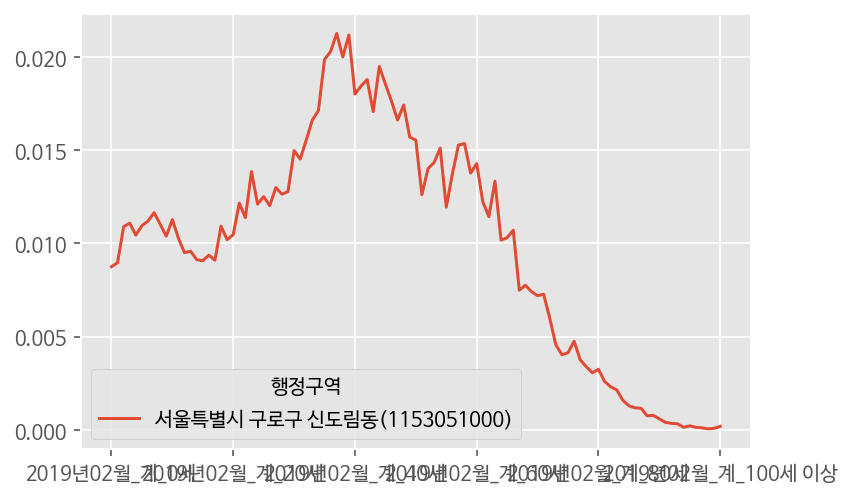

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5), dpi=200)
plt.style.use("ggplot")
df2.T.plot()
plt.show()

In [12]:
df2.iloc[0]

2019년02월_계_0세         0.008747
2019년02월_계_1세         0.008962
2019년02월_계_2세         0.010894
2019년02월_계_3세         0.011082
2019년02월_계_4세         0.010438
                        ...   
2019년02월_계_96세        0.000134
2019년02월_계_97세        0.000107
2019년02월_계_98세        0.000054
2019년02월_계_99세        0.000080
2019년02월_계_100세 이상    0.000188
Name: 서울특별시 구로구 신도림동(1153051000), Length: 101, dtype: float64

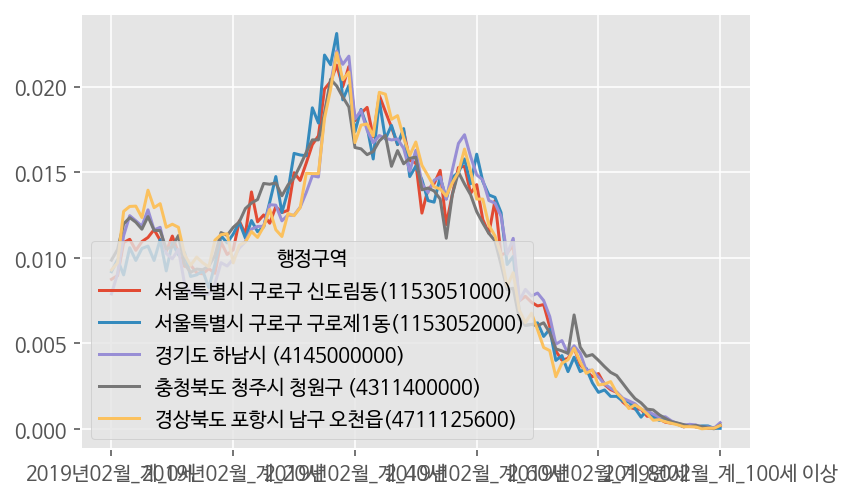

In [18]:
import numpy as np
df.loc[np.power(df.sub(df2.iloc[0], axis=1), 2).sum(axis=1).sort_values().index[:5]].T.plot()

원하는 지역의 이름을 입력해주세요 : 보람동


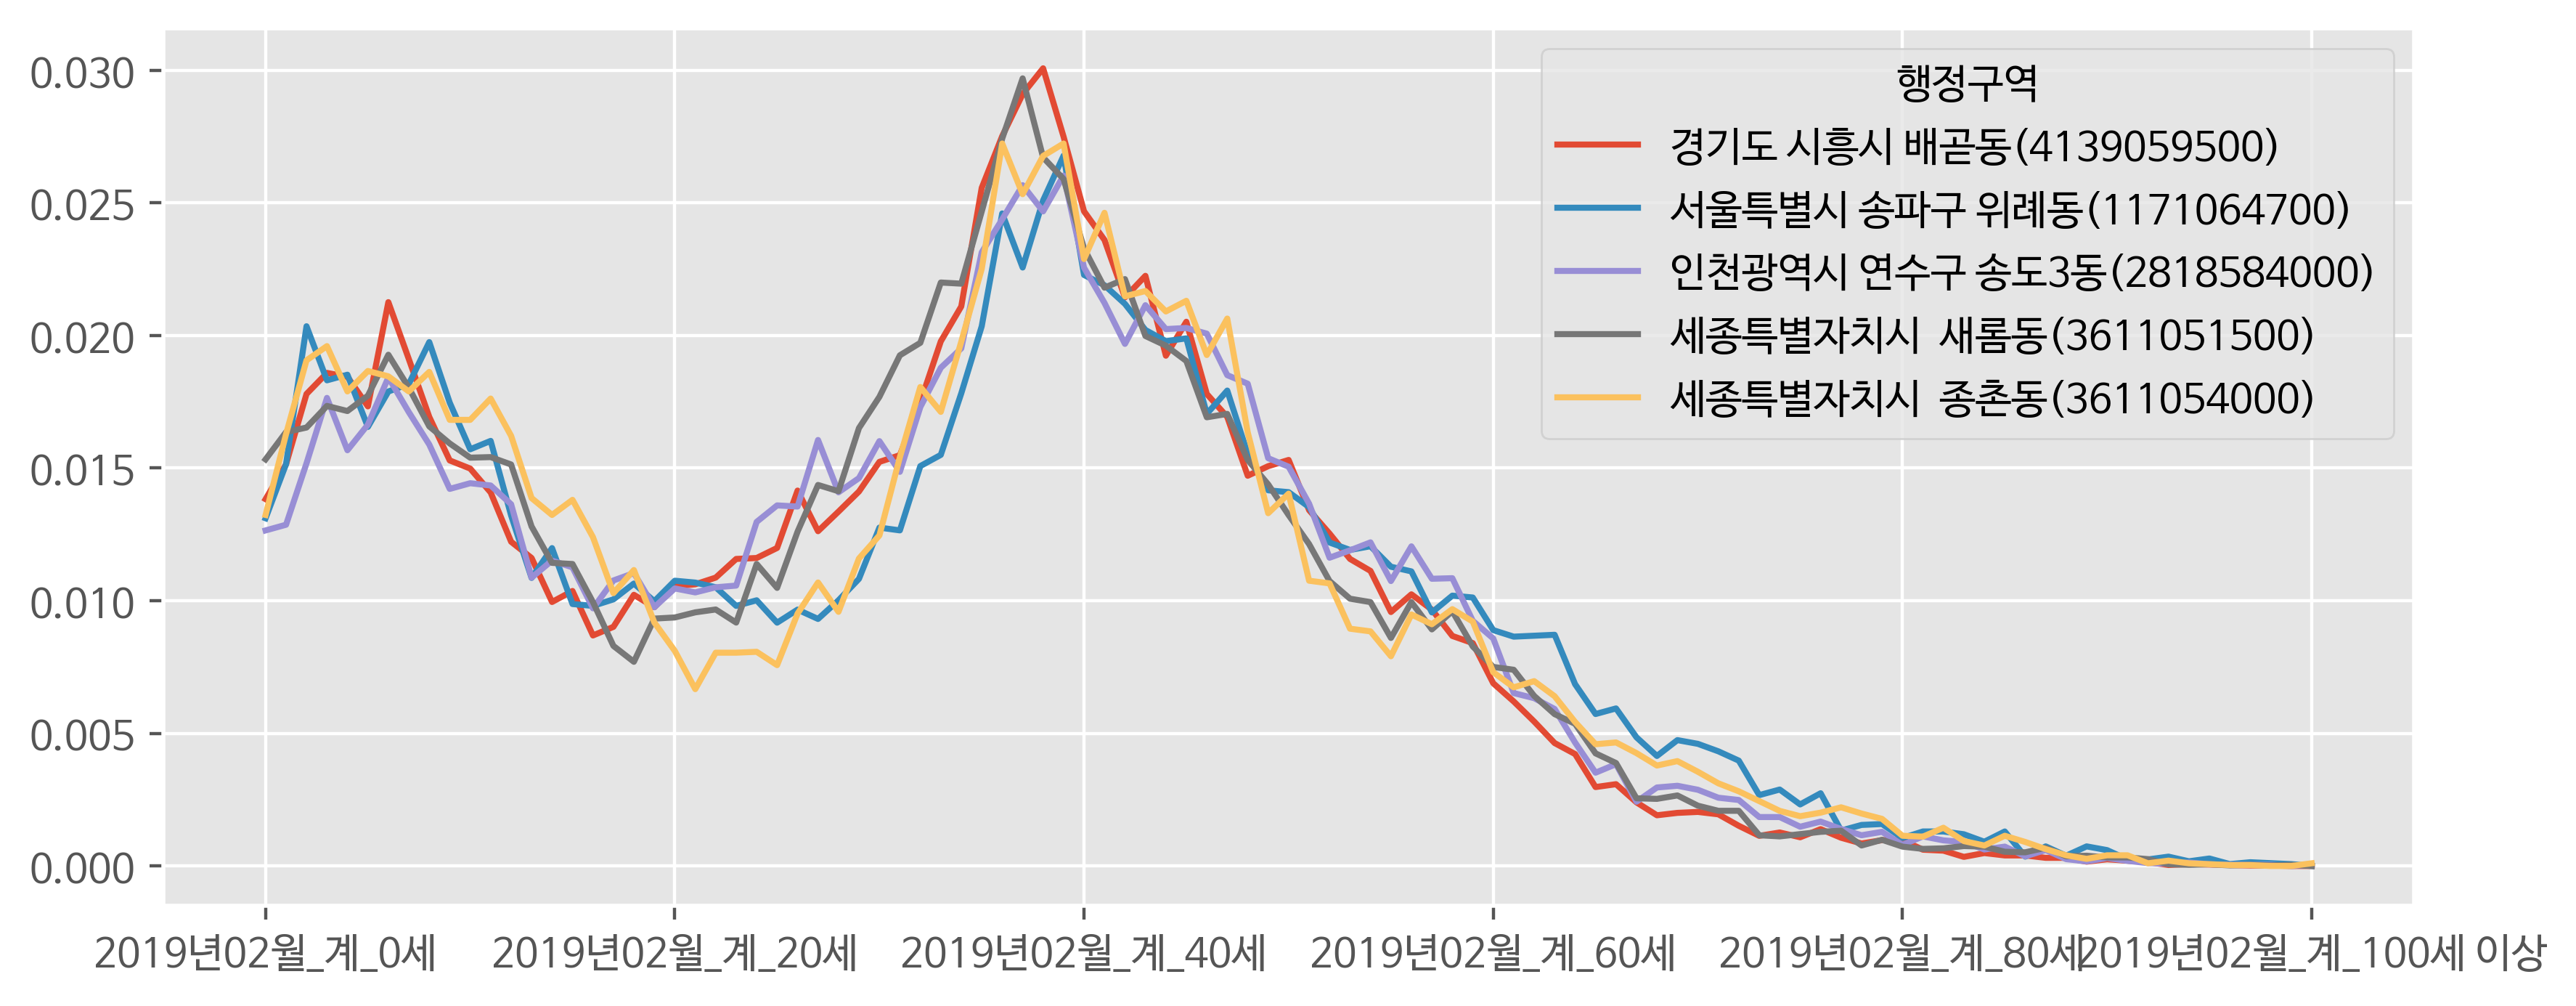

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rc("font", family = "NanumBarunGothic")
plt.rcParams["figure.figsize"] = (10, 4)
plt.rcParams["figure.dpi"] = 200

df = pd.read_csv("/content/age2019_02_noComa_cgName.csv", encoding="cp949", index_col=0)

df = df.div(df["총인구수"],axis=0)

del df["총인구수"], df["연령구간인구수"]

name = input("원하는 지역의 이름을 입력해주세요 : ")

a = df.index.str.contains(name)
df2 = df[a]

df.loc[np.power(df.sub(df2.iloc[0], axis = 1), 2).sum(axis=1).sort_values().index[1:6]].T.plot()